## Utilizando o portal da transparencia para obter alguns dados relevantes sobre nosso legislativo

##### Vamos iniciar buscando cada parlamentar vamos bucar também algumas imformações que nos permitam clusterizar como estado,partido,etc..

In [24]:
import httpx
import pandas as pd
url = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
response = httpx.get(url)
print(response.status_code)
dados = response.json()
data = []
for i in dados['dados']:
    entry ={
    'id' : i['id'],
    'Nome' : i['nome'], 
    'Partido' :  i['siglaPartido'],
    'Estado'  : i['siglaUf']
    }
    data.append(entry)

200


##### Agora vamos pegar armazenar esse dados em um dicionario interno e contabilizar os partidos

In [2]:
from collections import Counter
#Lista dos 29 partidos brasileiros
partidos_brasileros = [
    'MDB', 'PDT', 'PT', 'PCdoB', 'PSB', 'PSDB', 'AGIR', 'MOBILIZA',
    'CIDADANIA', 'PV', 'AVANTE', 'PP', 'PSTU', 'PCB', 'PRTB', 'DC',
    'PCO', 'PODE', 'REPUBLICANOS', 'PSOL', 'PL', 'PSD', 'SOLIDARIEDADE',
    'NOVO', 'REDE', 'PMB', 'UP', 'UNIÃO', 'PRD'
]

#Lista de partidos 
partidos_dataset = [i['siglaPartido'] for i in dados['dados']]

#Conta os partidos no dataset
contagem_de_partidos_dataset = Counter(partidos_dataset)
#Ponhe zero para partidos que não apareça no dataset
contagem_de_partidos_total = {partidos : 0 for partidos in partidos_brasileros}
#Atualiza o dicionario com as contagens do dataset
contagem_de_partidos_total.update(contagem_de_partidos_dataset)

print(contagem_de_partidos_total)

{'MDB': 44, 'PDT': 18, 'PT': 68, 'PCdoB': 7, 'PSB': 14, 'PSDB': 12, 'AGIR': 0, 'MOBILIZA': 0, 'CIDADANIA': 5, 'PV': 5, 'AVANTE': 7, 'PP': 50, 'PSTU': 0, 'PCB': 0, 'PRTB': 0, 'DC': 0, 'PCO': 0, 'PODE': 14, 'REPUBLICANOS': 44, 'PSOL': 13, 'PL': 91, 'PSD': 45, 'SOLIDARIEDADE': 5, 'NOVO': 4, 'REDE': 1, 'PMB': 0, 'UP': 0, 'UNIÃO': 59, 'PRD': 5, 'S.PART.': 1}


In [3]:
from collections import Counter

#Lista de estados 
estados_dataset = [i['siglaUf'] for i in dados['dados']]

#Conta os estados no dataset
contagem_de_estados = Counter(estados_dataset)

print(contagem_de_estados)

Counter({'SP': 70, 'MG': 53, 'RJ': 46, 'BA': 39, 'RS': 31, 'PR': 30, 'PE': 25, 'CE': 21, 'MA': 18, 'GO': 17, 'PA': 17, 'SC': 16, 'PB': 12, 'ES': 10, 'PI': 10, 'AL': 9, 'MT': 8, 'AP': 8, 'AM': 8, 'DF': 8, 'RR': 8, 'TO': 8, 'AC': 8, 'RN': 8, 'MS': 8, 'SE': 8, 'RO': 8})


##### Agora vamos implementar um filtro no grafico que permite o usario selecionar o estado 

In [4]:
import ipywidgets as widgetsano
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.DataFrame(data)
estados_brasileiros = df['Estado'].unique()
print(len(df))



def atualiza_grafico(estado=None):#Dlecara o filtro inicialmente vazio
    #Limpa o grafico pré Existente
    plt.close()
    #Filtra os dados para o estado selecionado
    if estado and estado != 'Todos':
        dados_estado = df[df['Estado'] == estado]
    else:
        dados_estado = df
    contagem_de_partidos = Counter(dados_estado['Partido'])

    
    #Configurações da aparencia do grafico
    plt.figure(figsize=(10, 6))
    
    #Cria o grafico de barras
    bars = plt.bar(contagem_de_partidos.keys(),contagem_de_partidos.values())

    #Adiciona o numero total de deputados
    plt.text(0.95, 0.95, f'Total: {len(dados_estado)}', 
             ha='right', va='top', fontsize=12, color='black', transform=plt.gca().transAxes, 
             bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    
    #Adicionando de_nome_para_idos valores em cima da barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

    #Legenda
    plt.xticks(rotation=90)
    plt.xlabel("Partido")
    plt.ylabel("Numero de deputados")
    
    #Configuração da exibição do grafico
    plt.tight_layout()
    plt.show()


#Cria um filtro por estado
dropdown_estado = widgets.Dropdown(
    options = ['Todos'] + list(estados_brasileiros),
    description = "Estado:",
    disable = False
)


#Função para chamar o dropdown
def on_change(estado):
    atualiza_grafico(estado)

output = widgets.Output()
with output:
    atualiza_grafico(dropdown_estado.value),
# Conecta o widget à função de plotagem,
widgets.interactive(on_change, estado=dropdown_estado)




512


interactive(children=(Dropdown(description='Estado:', options=('Todos', 'MT', 'AP', 'AM', 'SP', 'BA', 'GO', 'M…

##### Agora um grafico simples que mostra a distriouição de parlementares por estado

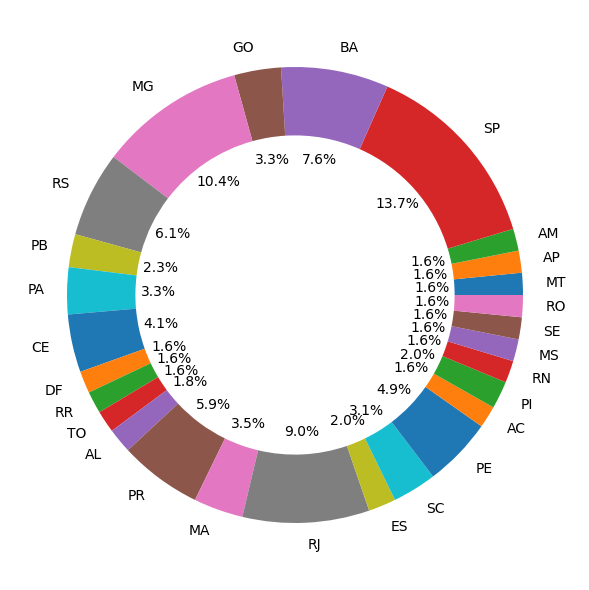

In [5]:
import matplotlib.pyplot as plt

#Configurações da aparencia do grafico
plt.figure(figsize=(10, 6))
#Cria o grafico de barras
plt.pie(contagem_de_estados.values(),labels=contagem_de_estados.keys(),wedgeprops={'width': 0.3}, autopct='%1.1f%%')
#Legenda
#Configuração da exibição do grafico
plt.tight_layout()
plt.show()

##### Conversor de id do parlamentar para nome

In [26]:
de_id_para_nome = {}
for i in data:
    de_id_para_nome[str(i['id'])] = i['Nome']

print(de_id_para_nome)

{'220593': 'Abilio Brunini', '204379': 'Acácio Favacho', '220714': 'Adail Filho', '221328': 'Adilson Barroso', '204560': 'Adolfo Viana', '204528': 'Adriana Ventura', '121948': 'Adriano do Baldy', '74646': 'Aécio Neves', '136811': 'Afonso Hamm', '178835': 'Afonso Motta', '160527': 'Aguinaldo Ribeiro', '204495': 'Airton Faleiro', '204549': 'AJ Albuquerque', '73579': 'Alberto Fraga', '74696': 'Alberto Mourão', '220538': 'Albuquerque', '160559': 'Alceu Moreira', '204501': 'Alencar Santana', '178972': 'Alex Manente', '204571': 'Alex Santana', '220542': 'Alexandre Guimarães', '160545': 'Alexandre Leite', '220554': 'Alexandre Lindenmeyer', '221148': 'Alfredinho', '220576': 'Alfredo Gaspar', '74057': 'Alice Portugal', '178927': 'Aliel Machado', '226708': 'Allan Garcês', '178937': 'Altineu Côrtes', '178881': 'Aluisio Mendes', '220707': 'Amanda Gentil', '204356': 'Amaro Neto', '220715': 'Amom Mandel', '107970': 'Ana Paula Leão', '220556': 'Ana Paula Lima', '220632': 'Ana Pimentel', '204423': 'An

### Analise de gastos por parlamentar

##### Criação da visualização da tabela dinamica

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_table
import ipywidgets as widgets
from IPython.display import display, clear_output

def gera_dinamica(dinamica_frame):
  clear_output(wait=True)
  # Inicializar a aplicação Dash
  app = dash.Dash(__name__)

  # Layout da aplicação
  app.layout = html.Div([
      html.H1("Tabela Dinâmica Interativa"),

      # Dropdown para selecionar o fornecedor
      dcc.Dropdown(
          id='fornecedor-dropdown',
          options=[{'label': fornecedor, 'value': fornecedor} for fornecedor in dinamica_frame['fornecedor'].unique()],
          value=None,
          placeholder="Selecione um fornecedor"
      ),

      # Dropdown para selecionar tipo de gasto
      dcc.Dropdown(
          id='gasto-dropdown',
          options=[{'label': tipo, 'value': tipo} for tipo in dinamica_frame['descricao'].unique()],
          value=None,
          placeholder="Selecione um gasto"
      ),

      # Dropdown para selecionar ano
      dcc.Dropdown(
          id='ano-dropdown',
          options=[{'label': ano, 'value': ano} for ano in dinamica_frame['ano'].unique()],
          value=None,
          placeholder="Selecione um ano"
      ),


      # Tabela para exibir os dados
      dash_table.DataTable(
          id='tabela-dinamica',
          columns=[{'name': col, 'id': col} for col in dinamica_frame.columns],
          data=dinamica_frame.to_dict('records'),
          filter_action="native",
          sort_action="native",
          page_size=10  # Quantidade de linhas por página
      )
  ])

  # Callback para atualizar a tabela com base nos filtros
  @app.callback(
      Output('tabela-dinamica', 'data'),
      [Input('fornecedor-dropdown', 'value'),
      Input('gasto-dropdown', 'value')],
      [Input('ano-dropdown', 'value')]
  )
  def atualizar_tabela(fornecedor,gasto,ano):
      df_filtrado = dinamica_frame.copy()

      if fornecedor:
          df_filtrado = df_filtrado[df_filtrado['fornecedor'] == fornecedor]
      if gasto:
          df_filtrado = df_filtrado[df_filtrado['descricao'] == gasto]
      if ano:
          df_filtrado = df_filtrado[df_filtrado['ano'] == ano]

      return df_filtrado.to_dict('records')

  # Executar o aplicativo
  if __name__ == '__main__':
      app.run_server(debug=True)

##### Criação da base que vai fornecer os dados para a tabela dinamica

In [ ]:
df_2024 = pd.read_json('/content/drive/MyDrive/ecosTransparentes/Gastos-2024.json')
df_2023 = pd.read_json('/content/drive/MyDrive/ecosTransparentes/Gastos-2023.json')



# Função que será chamada após a seleção do deputado
def gerar_base(deputado):
  def gasto_parlamentar_2024(nomeParlamentar):
    return [parlamentar for parlamentar in df_2024['dados'] if parlamentar['nomeParlamentar'] == nomeParlamentar]
  def gasto_parlamentar_2023(nomeParlamentar):
    return [parlamentar for parlamentar in df_2023['dados'] if parlamentar['nomeParlamentar'] == nomeParlamentar]


  ###Selecionando somente os dados relevantes para nossa analise
  dados = {'descricao':[],'valor_gasto' : [],'ano':[],'fornecedor':[]}
  total_gasto_2023 = 0
  total_gasto_2024 = 0

  for gasto in gasto_parlamentar_2023(deputado):
    total_gasto_2023 += float(gasto['valorLiquido'])
    dados['descricao'].append(gasto['descricao']),
    dados['valor_gasto'].append(float(gasto['valorLiquido'])),
    dados['ano'].append(2023),
    dados['fornecedor'].append(gasto['fornecedor'])

  for gasto in gasto_parlamentar_2024(deputado):
    total_gasto_2024 += float(gasto['valorLiquido'])
    dados['descricao'].append(gasto['descricao']),
    dados['valor_gasto'].append(float(gasto['valorLiquido'])),
    dados['ano'].append(2024),
    dados['fornecedor'].append(gasto['fornecedor'])


  dataFrame = pd.DataFrame(dados)
  dataFrame.loc[len(dataFrame)] = ['Total',f'{total_gasto_2023: .2f}',2023,'-']
  dataFrame.loc[len(dataFrame)] = ['Total',f'{total_gasto_2024: .2f}',2024,'-']

  gera_dinamica(dataFrame)

##### Função que seleciona o deputado a ser analisado

In [ ]:
# Lista de deputados
deputados = [nome['Nome'].lower() for nome in data]

# Função para filtrar os deputados conforme a busca
def buscar_deputado(deputado):
    if deputado.lower() not in deputados:
      return 'Deputado Não encontrado'
    return gerar_base(deputado)

# Cria um campo de texto para a busca
campo_busca = widgets.Text(
    value='',
    placeholder='Digite o nome do deputado...',
    description='Buscar:',
)


# Função chamada quando um deputado é selecionado
def on_buscar_click(b):
    return buscar_deputado(b)

# Botão "Buscar"
botao_buscar = widgets.Button(
    description="Buscar",
    button_style='success',  # Cor verde para o botão
    tooltip="Clique para buscar"
)

# Conectar a ação do botão ao evento de clique
botao_buscar.on_click(lambda b: on_buscar_click(campo_busca.value))

# Exibe o campo de busca, a lista de deputados e o botão "Buscar"
display(campo_busca, botao_buscar)